# TestGroundState

### This notebook a) provides tests to ensure the methods of wavefunctiontools.py are correct, b)demonstrates how those methods can be used to generate output for the GAN, and c) to demonstrates how they can be used to validate the GAN.

In [1]:
import numpy as np
import wavefunctiontools
import pylab
import matplotlib.pyplot as plt
import numpy.linalg as npla
%matplotlib inline
%load_ext autoreload
%autoreload 2
pylab.rcParams['figure.figsize']=(9,7)
pylab.rcParams['font.size']=12

## Test 1: Check the sparse multiplication

This test creates random matrices of the form $\mathbf{C} = \mathbf{A}_1 \otimes \mathbf{A}_2 \otimes \ldots \otimes \mathbf{A}_N$, converts them to $\texttt{OperatorChain}$, and multiplies them by a random vector $\mathbf{v}$. It then ensures that $\mathbf{C}\mathbf{v}$ gives the same result whether the sparse ($\texttt{OperatorChain.timesvectorsparse}$) or dense ($\texttt{OperatorChain.timesvectordense}$) methods are used. It also tests against dense multiplication using np.array.

In [2]:
for N in range(2, 9):
    for d in [2, 3]:
        print "***************************************************************"
        print "N=", N, "d=", d
        wavefunctiontools.testchaintimesvector(N, d=d, Ntimes=30)
        print "***************************************************************"


***************************************************************
N= 2 d= 2
Sparse vs dense OperatorChains: 
err:  1.7731555583795125e-16
Passed!
Dense OperatorChain vs np.array: 
err:  0.0
Passed!
***************************************************************
***************************************************************
N= 2 d= 3
Sparse vs dense OperatorChains: 
err:  8.550339214846362e-16
Passed!
Dense OperatorChain vs np.array: 
err:  0.0
Passed!
***************************************************************
***************************************************************
N= 3 d= 2
Sparse vs dense OperatorChains: 
err:  8.639967861308813e-16
Passed!
Dense OperatorChain vs np.array: 
err:  0.0
Passed!
***************************************************************
***************************************************************
N= 3 d= 3
Sparse vs dense OperatorChains: 
err:  2.9355375901470326e-15
Passed!
Dense OperatorChain vs np.array: 
err:  0.0
Passed!
**************************

## Test 2: Constructing the dense Hamiltonian

Tests that $\texttt{NNHamiltonianDense}$ generates the correct matrix in the 1D case (with either $Nx=1$ or $Ny=1$), by comparing the results with a function that does not account for the 2D case. 

In [3]:
for N in range(2, 7):
    for d in [2, 3]:
        print "***************************************************************"
        print "N=", N, "d=", d
        wavefunctiontools.testdensehamiltonianconstruction(N, d=d, Ntimes=30, Nops=2)
        print "***************************************************************"


***************************************************************
N= 2 d= 2
Nx=1 : 
err:  1.2098374922832824e-16
Passed!
Ny=1 :
err:  2.2740100924753445e-16
Passed!
Nx vs Ny: 
err:  0.0
Passed!
***************************************************************
***************************************************************
N= 2 d= 3
Nx=1 : 
err:  3.715468305544151e-16
Passed!
Ny=1 :
err:  7.649796164618121e-16
Passed!
Nx vs Ny: 
err:  0.0
Passed!
***************************************************************
***************************************************************
N= 3 d= 2
Nx=1 : 
err:  7.57200339216523e-16
Passed!
Ny=1 :
err:  3.2231797060046307e-16
Passed!
Nx vs Ny: 
err:  0.0
Passed!
***************************************************************
***************************************************************
N= 3 d= 3
Nx=1 : 
err:  9.832439594697654e-16
Passed!
Ny=1 :
err:  1.5568966824285942e-15
Passed!
Nx vs Ny: 
err:  0.0
Passed!
*********************************************

## Test 3: Comparing the dense and sparse Hamiltonians

This ensures that $\mathtt{NNHamiltonianDense}$ and $\mathtt{NNHamiltonianSparse}$ behave identically; e.g. that $\mathtt{matvec}$ and $\mathtt{eigs}$ give the same results. In addition, test that converting the sparse to the dense representation yields the same matrix as constructing the dense representation in the first place.

In [4]:
for Nx in range(2, 4):
    for Ny in range(2, 4):
        print "Nx, Ny:", Nx, Ny
        wavefunctiontools.checksparsedense(Nx, Ny, Ntimes=10)

Nx, Ny: 2 2
err(H):  1.9812168514414004e-15
err(H*vec):  1.8914682758742802e-15
err(eigvals):  1.5374549428178251e-12
Nx, Ny: 2 3
err(H):  7.337919288915153e-15
err(H*vec):  5.868272642853741e-15
err(eigvals):  7.541144090116654e-12
Nx, Ny: 3 2
err(H):  7.708362763403355e-15
err(H*vec):  7.339156730591411e-15
err(eigvals):  7.97115252578803e-12
Nx, Ny: 3 3
err(H):  3.2535794278598616e-14
err(H*vec):  2.576670042713659e-14
err(eigvals):  4.2718823069322196e-11


## Test 4: Check against some hand-built matrices

For $H = c\sum_{<ij>} A_iB_j$ on a 2x2 grid we should get $c$ times a sum of 8 terms: $ABII, AIBI, BAII, IAIB, IIAB, BIAA, IBIA, IIBA$. This test explicitly sums $Nops$ of such terms (for random c, A, B) and makes sure the resulting matrix is the same as that within $\mathtt{NNHamiltonianDense}$. In addition, it checks that matvec and eigs give the same results as directly operating on that sum. It then performs the analogous test for a 3x3 grid.

In [5]:
print "d=2"
wavefunctiontools.checkhandbuilt(d=2, Ntimes=10, Nops=2)
#print "d=3"
#wavefunctiontools.checkhandbuilt(d=3, Ntimes=5, Nops=2)

d=2
N= 2
err(H):  8.377408332913577e-15
err(H*vec):  9.490882277456878e-15
err(eigvals):  3.611824479789014e-14
N= 3
err(H):  1.2098848552446536e-13
err(H*vec):  1.353927787520978e-13
err(eigvals):  3.84584563925917e-13


## Test 5: Check the Ising model

This generates Ising models for various values of $J$ and $h$ and repeats test 3 on the results.

In [6]:
for Nx in range(2, 4):
    for Ny in range(2, 4):
        print "Nx, Ny:", Nx, Ny
        wavefunctiontools.checkIsing(Nx, Ny, Ntimes=1)

Nx, Ny: 2 2
err(H):  0.0
err(H*vec):  4.215883941633167e-14
err(eigvals):  1.4725110020208376e-11
Nx, Ny: 2 3
err(H):  0.0
err(H*vec):  1.341099868660333e-13
err(eigvals):  5.1237236675660824e-11
Nx, Ny: 3 2
err(H):  0.0
err(H*vec):  1.2387424326718283e-13
err(eigvals):  4.1587178145618964e-11
Nx, Ny: 3 3
err(H):  0.0
err(H*vec):  5.185825530186775e-13
err(eigvals):  2.2887292061568587e-10


Make sure the correct energy is reported for h=0 and J=0

In [7]:
for Nx in range(1, 4):
    for Ny in range(2, 4):
        print "Nx, Ny=", Nx, Ny
        wavefunctiontools.IsingTest(Nx, Ny)

Nx, Ny= 1 2
err (h=0):  [2.84217094e-14]
err (J=0):  [8.52651283e-14]
Nx, Ny= 1 3
err (h=0):  [0.]
err (J=0):  [1.32782674e-13]
Nx, Ny= 2 2
err (h=0):  [7.10542736e-14]
err (J=0):  [1.98951966e-13]
Nx, Ny= 2 3
err (h=0):  [7.54951657e-14]
err (J=0):  [1.13686838e-13]
Nx, Ny= 3 2
err (h=0):  [9.50350909e-14]
err (J=0):  [2.08721929e-13]
Nx, Ny= 3 3
err (h=0):  [1.38555833e-13]
err (J=0):  [2.0250468e-13]


# Check the SpinChainWavefunction stuff


### Make $|00>$

In [8]:
ket0 = np.array([1.+0.j, 0])
ket1 = np.array([0, 1.+0.j])
amps = np.kron(ket0, ket0)
wf00 = wavefunctiontools.SpinChainWavefunction(amps, 2, 1)

X = wavefunctiontools.Sig_x
Y = wavefunctiontools.Sig_y
Z = wavefunctiontools.Sig_z
print wf00.wf
print wf00.Nx
print wf00.Ny

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
2
1


### Check Pauli gates work

In [9]:
wfIX = wf00.applygate(1, X)
ix = np.kron(ket0, ket1)
print "IX: ", wfIX.wf
print "should be |01> = ", ix 
print  0==np.count_nonzero(wfIX.wf-ix)

wfXI = wf00.applygate(0, X)
xi = np.kron(ket1, ket0)
print "XI: ", wfXI.wf
print "should be |10> = ", xi
print 0==np.count_nonzero(wfXI.wf-xi)

wfXX = wf00.applychain(wavefunctiontools.OperatorChain([X,X]))
xx = np.kron(ket1, ket1)
print "XX: ", wfXX.wf
print "should be |11> = ", np.kron(ket1, ket1)
print 0==np.count_nonzero(wfXX.wf-xx)


IX:  [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
should be |01> =  [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
True
XI:  [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
should be |10> =  [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
True
XX:  [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
should be |11> =  [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
True


### Overlap of $|00>$ with $\frac{1}{\sqrt{2}}(|00> - |11>)$ should be $\frac{1}{\sqrt{2}}$

In [10]:
amps2 = 1./(np.sqrt(2)) * (amps - xx)
wfbell = wavefunctiontools.SpinChainWavefunction(amps2, 2, 1)
print wfbell.overlap(wf00)*np.sqrt(2)

(1+0j)


In [11]:
print wfbell.expectationvalue(1, Z) #0
print wf00.expectationvalue(1,Z) #1
print wfXX.expectationvalue(1,Z) #-1
print wfIX.expectationvalue(0,Z) #1
print wfXI.expectationvalue(0,Z) #-1
print wfXX.expectationvaluechain(wavefunctiontools.OperatorChain([Z,Z])) #1

0.0
1.0
-1.0
1.0
-1.0
1.0


In [12]:
print wfXX.wf
outcome, measured = wfXX.measure(0, basis='Y')
print outcome
print measured.wf

[0.+0.j 0.+0.j 0.+0.j 1.+0.j]
1
[0.+0.j 0.-1.j 0.+0.j 0.+0.j]


In [13]:
print list('zz')

['z', 'z']


### "Cascaded" measurements, one basis at each site.

In [14]:
testarr = np.arange(1, 5, dtype=np.complex128)
testwf = wavefunctiontools.SpinChainWavefunction(testarr, 2, 1).normalize()
print testwf.wf
print testwf.cascadedmeasurement('ZZ')
print wfbell.cascadedmeasurement('XX') #antialigned
print wfbell.cascadedmeasurement('YY') #aligned
print wfbell.cascadedmeasurement('ZZ') #aligned
print wfbell.cascadedmeasurement('XY') #aligned
print wfbell.cascadedmeasurement('YZ') #aligned

[0.18257419+0.j 0.36514837+0.j 0.54772256+0.j 0.73029674+0.j]
[[-1 -1]]
[[ 1 -1]]
[[1 1]]
[[1 1]]
[[1 1]]
[[1 1]]


### Check that correct probabilities are recovered in computational basis


In [15]:
def prob2d(wf, Ntimes=1000):
    dd = 0.
    du = 0.
    ud = 0.
    uu = 0.
    for _ in range(0, Ntimes):
        outcome = list(wf.cascadedmeasurement("ZZ")[0])
        if outcome == [-1, -1]:
            dd += 1.
        elif outcome == [-1, 1]:
            du += 1.
        elif outcome == [1, -1]:
            ud += 1.
        elif outcome == [1, 1]:
            uu += 1.
    dd /= Ntimes
    du /= Ntimes
    ud /= Ntimes
    uu /= Ntimes
    return uu, ud, du, dd    

In [16]:
probs = (np.conj(testwf.wf)*testwf.wf).real
print "Correct: ", probs
print "10 measurements: "
print prob2d(testwf, Ntimes=10)
print "100 measurements: "
print prob2d(testwf, Ntimes=100)
print "1000 measurements: "
print prob2d(testwf, Ntimes=1000)
print "10000 measurements: "
print prob2d(testwf, Ntimes=10000)


Correct:  [0.03333333 0.13333333 0.3        0.53333333]
10 measurements: 
(0.0, 0.0, 0.2, 0.8)
100 measurements: 
(0.02, 0.13, 0.27, 0.58)
1000 measurements: 
(0.031, 0.122, 0.325, 0.522)
10000 measurements: 
(0.033, 0.1369, 0.2975, 0.5326)


### Directional measurements representing local detectors aligned along arbitrary angles.

In [17]:
dir0 = (0.,0.,1.)
dir1 = (0.25, 0.5, 1.)
wfbell.cascadedmeasurement([dir0, dir1], directional=True)

array([[1, 1]])

### Simulate Bell experiment

In [18]:
def bellexperiment(wf, Ntrials, Nangles=100):
    dir0 = (0., 0., 1.)
    angles = np.linspace(0., 2*np.pi)
    dir2s = [(0., np.sin(ang), np.cos(ang)) for ang in angles]
    results = np.zeros(angles.shape)
    tocorr = lambda x: np.abs(x[0]+x[1])-1
    for _ in range(0, Ntrials):
        outcomes =[wf.cascadedmeasurement([dir0, dir2], directional=True)[0] 
                    for dir2 in dir2s]
        results += map(tocorr, outcomes)
    results /= Ntrials
    return angles, results
   

In [19]:
trials = [10, 100, 1000]
outcomes = [bellexperiment(wfbell, trial) for trial in trials]

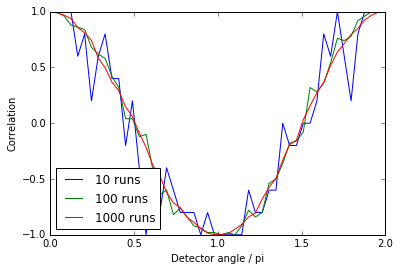

In [20]:
plt.plot(outcomes[0][0] / np.pi, outcomes[0][1], label="10 runs")
plt.plot(outcomes[1][0] / np.pi, outcomes[1][1], label="100 runs")
plt.plot(outcomes[2][0] / np.pi, outcomes[2][1], label="1000 runs")
plt.xlabel("Detector angle / pi")
plt.ylabel("Correlation")
plt.legend(loc="lower left")

# Generating basis measurements

### Note: with h=0.0, the ground state is highly degenerate (no spin direction is favoured so long as all spins are aligned). The iterative solver randomly picks out one of these degenerate states. Therefore, the expectation values, but not the energies, reported in the cell following this one will change from run to run.

In [21]:
Eisingsm, wfisingsm = wavefunctiontools.makeisingground(1, 6, 1.0, 0.0)
print Eisingsm
allZs6 = wavefunctiontools.OperatorChain([Z]*6)
allXs6 = wavefunctiontools.OperatorChain([X]*6)
allYs6 = wavefunctiontools.OperatorChain([Y]*6)
print "Z: ", wfisingsm.expectationvaluechain(allZs6)
print "X: ", wfisingsm.expectationvaluechain(allXs6)
print "Y: ", wfisingsm.expectationvaluechain(allYs6)

[-6.]
Z:  0.7138968440601065
X:  1.0
Y:  -0.7138968440601065


In [22]:
Eisingsm, wfisingsm = wavefunctiontools.makeisingground(1, 6, 1.0, 20.0)
print Eisingsm
allZs6 = wavefunctiontools.OperatorChain([Z]*6)
allXs6 = wavefunctiontools.OperatorChain([X]*6)
allYs6 = wavefunctiontools.OperatorChain([Y]*6)
print "Z: ", wfisingsm.expectationvaluechain(allZs6)
print "X: ", wfisingsm.expectationvaluechain(allXs6)
print "Y: ", wfisingsm.expectationvaluechain(allYs6)

[-120.0750118]
Z:  1.0000000000000002
X:  3.130866676908359e-05
Y:  -3.130866676908359e-05


### Careful: the next cell may take a long time (~minutes) to run.

In [23]:
#Here we choose a highish value of h (1.5) to get a less-degenerate ground-state
Eising, wfising = wavefunctiontools.makeisingground(4, 4, 1.0, 1.5)

In [24]:
allZs = wavefunctiontools.OperatorChain([Z]*16)
allXs = wavefunctiontools.OperatorChain([X]*16)
allYs = wavefunctiontools.OperatorChain([Y]*16)
print "Z:", wfising.expectationvaluechain(allZs)
print "X:", wfising.expectationvaluechain(allXs)
print "Y:", wfising.expectationvaluechain(allYs)

Z: 0.9999999999999413
X: 0.0034102203958318957
Y: 0.0034102203958318957


In [25]:
compbasis = ['Z']*16
outcome = wfising.cascadedmeasurement(compbasis)

print outcome

[[ 1  1  1  1]
 [ 1  1  1  1]
 [ 1  1 -1  1]
 [ 1  1 -1  1]]


## Train the GAN on the output from this function

In [26]:
def observations(mywf, basis, Ntimes):
    return [mywf.cascadedmeasurement(basis) for _ in range(0, Ntimes)]
print observations(wfising, compbasis, 2)

[array([[ 1,  1,  1,  1],
       [ 1,  1,  1, -1],
       [ 1,  1, -1, -1],
       [ 1,  1, -1,  1]]), array([[ 1,  1,  1,  1],
       [ 1, -1,  1, -1],
       [ 1,  1,  1,  1],
       [ 1,  1,  1,  1]])]


## Use these to validate the results

In [27]:
def obstoprob(observations):
    """
    Converts a set of observations from cascadedmeasurement into a vector of
    probabilites. 
    """
    N = observations[0].size
    probs = np.zeros(2**N, dtype=np.float64)
    probs = probs.reshape([2]*N)
    for obs in observations:
        obs = np.abs((obs-1))/2 #now up is zero and down is one
        #print obs
        obidx = np.zeros(16, dtype=int)
        #print probs[obidx]
        probs[tuple(np.ravel(obs))] += 1 #so we can use it as an index
        #print np.ravel(probs)[0], np.ravel(probs)[1]
    probs = probs.reshape((2**N))
    probs/=len(observations)
    return probs


In [28]:
theseobs = observations(wfising, compbasis, 1000)

In [29]:
probs = obstoprob(theseobs)

In [30]:
print probs
print np.sum(probs)

[0.55 0.   0.   ... 0.   0.   0.  ]
1.0000000000000002


In [ ]:
def validateprob(observations, wf):
    trueprob = np.array((np.conj(wf.wf)*wf.wf).real, dtype=np.float64)
    empprob = obstoprob(observations)
    return np.sqrt(np.sum(empprob-trueprob)**2)

In [39]:
def validateprobsavemem(observations, wf):
    trueprob = np.array((np.conj(wf.wf)*wf.wf).real, dtype=np.float64)
    empprob = obstoprob(observations)
    thesum=0.0
    for i in range(0, trueprob.size):
        thesum += (trueprob[i] - empprob[i])**2
    return np.sqrt(thesum)[0]

In [32]:
validateprob(theseobs, wfising) 
#This produces a memory error for me

MemoryError: 

### Make sure obstoprob works

In [59]:
testobs = observations(testwf, ['Z']*2, 10000)
empprobs = obstoprob(testobs)
testprobs = (np.conj(testwf.wf)*testwf.wf).real
print empprobs
print testprobs

[0.033  0.1356 0.2998 0.5316]
[0.03333333 0.13333333 0.3        0.53333333]


In [44]:
obs10 = observations(wfising, compbasis, 10)
obs100 = observations(wfising, compbasis, 100)
print validateprobsavemem(obs10, wfising)
print validateprobsavemem(obs100, wfising)
print validateprobsavemem(theseobs, wfising)

0.19748765982602712
0.07100153135817175
0.03520199504044036


In [50]:
Eising4, wfising4 = wavefunctiontools.makeisingground(2, 2, 1.0, 1.5)
compbasis4 = ['Z']*4
obs410 = observations(wfising4, compbasis4, 10)
obs4100 = observations(wfising4, compbasis4, 100)
obs41000 = observations(wfising4, compbasis4, 1000)
obs410000 = observations(wfising4, compbasis4, 10000)
obs4100000 = observations(wfising4, compbasis4, 100000)
d10 = validateprobsavemem(obs410, wfising4)
d100 = validateprobsavemem(obs4100, wfising4)
d1000 = validateprobsavemem(obs41000, wfising4)
d10000 = validateprobsavemem(obs410000, wfising4)
d100000 = validateprobsavemem(obs4100000, wfising4)

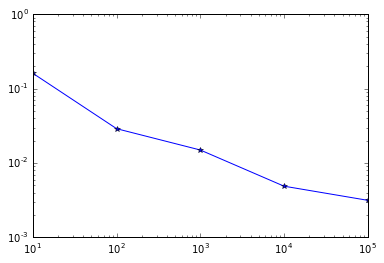

In [53]:
plt.loglog([10,100,1000,10000,100000], [d10,d100,d1000,d10000,d100000], marker="*")